In [40]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

<Axes: >

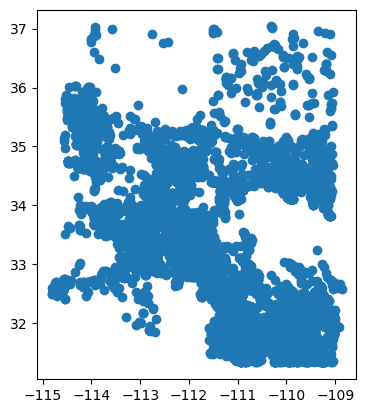

In [41]:
data = gpd.read_parquet("our_data/processed_data.parquet")
wells = pd.read_parquet("our_data/wells_with_depth_trend.parquet")
wells['geometry'] = gpd.points_from_xy(
    x=wells.SITE_LONGIT_DECIMAL, 
    y=wells.SITE_LATITUDE_DECIMAL, 
    crs="EPSG:4326"
    )
wells = gpd.GeoDataFrame(data=wells, geometry='geometry')
wells.plot()

<Axes: >

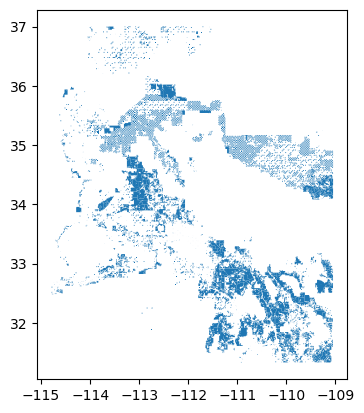

In [42]:
data.plot()

<Axes: >

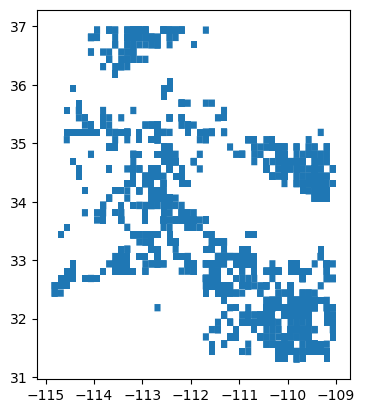

In [43]:
data = data.set_geometry("lease_quadrangle").set_crs(crs=3857).to_crs(crs=4326)
data.plot()


<Axes: >

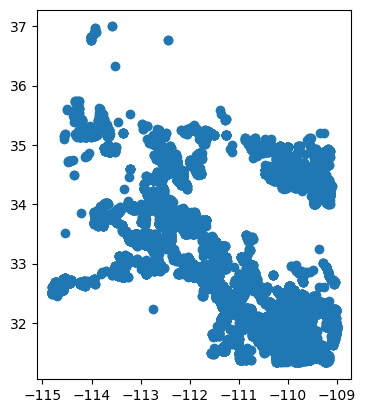

In [44]:
wells_on_leasedland = wells.sjoin( data, how='inner', predicate="within")
wells_on_leasedland=wells_on_leasedland.set_geometry("geometry_left")
wells_on_leasedland.plot()

<Axes: >

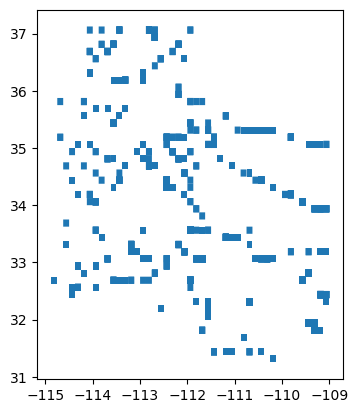

In [45]:
data = data.set_geometry("nearest_quadrangle").set_crs(crs=3857).to_crs(crs=4326)
data.plot()


In [46]:
wells.geometry

0        POINT (-111.77217 33.24114)
1        POINT (-111.89111 33.22514)
2        POINT (-112.51925 33.42536)
3        POINT (-109.46589 35.73914)
4        POINT (-110.94114 31.33292)
                    ...             
14973    POINT (-110.29938 37.01621)
14974    POINT (-110.30404 37.02159)
14975    POINT (-113.93108 37.02164)
14976    POINT (-110.31642 37.03642)
14977    POINT (-110.88444 31.98633)
Name: geometry, Length: 14978, dtype: geometry

<Axes: >

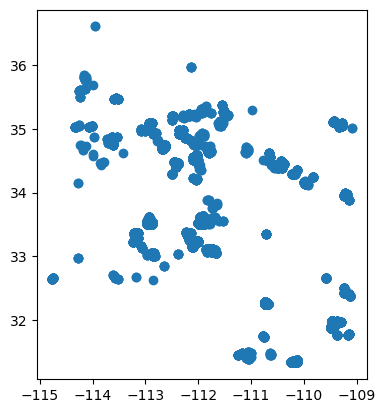

In [47]:
# leases = leases.set_geometry("nearest_quadrangle").set_crs("EPSG:4326")
wells_on_nearest_quadrangle = wells.sjoin( data, how='inner', predicate="within")
wells_on_nearest_quadrangle
wells_on_nearest_quadrangle=wells_on_nearest_quadrangle.set_geometry("geometry_left")
wells_on_nearest_quadrangle.plot()

<Axes: >

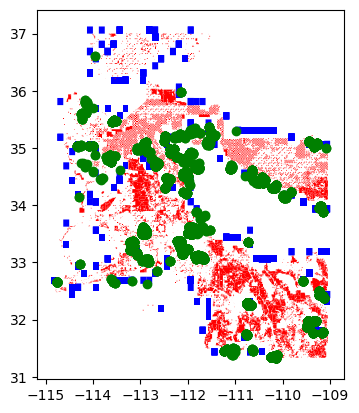

In [48]:
ourplot=data.plot(color='blue')
data = data.set_geometry("geometry")
data.plot(ax=ourplot, color="red")
wells_on_nearest_quadrangle.plot(ax=ourplot, color="green")

<Axes: >

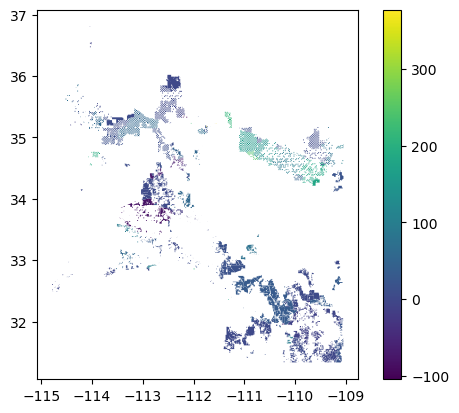

In [49]:
data.plot("nearby_depth_20_year_trend", legend=True)
#data.info()

In [50]:
data.head()

,geometry,OBJECTID,landnum,County,parcel,fundtxt,open_code,leased,ke,lse_code,...,NAME_right,TILE_NAME_right,LOCATION_right,LATLONG_ID_right,SHAPE_Leng_right,SHAPE_Area_right,lease_quadrangle,depth_20_year_trend,nearby_depth_20_year_trend,lease_quadrangle_depth_20_year_trend
lease_,,,,,,,,,,,,,,,,,,,,,
0,"MULTIPOLYGON Z (((-114.75238 32.47979 0.00000,...",46266,1 8 2910 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,0,N,0,0,...,LAST CHANCE CANYON,TRUMW,FORLN>NEWLIB>TRUMW,36113-D6,0.500004,0.015625,"POLYGON ((-113.62579 36.49998, -113.62578 36.3...",19.406827,NaN,NaN
1,"MULTIPOLYGON Z (((-111.49214 32.84347 0.00000,...",61994,4 6 835 11 91002,Pinal,1002,"LEGISLATIVE, EXEC, JUD BLDG",0,Y,5,0,...,PICACHO RESERVOIR,CASAE,FORLN>NEWLIB>CASAE,32111-G4,0.500000,0.015625,"POLYGON ((-111.37567 32.87507, -111.37567 32.7...",8.511935,16.450487,11.843229
4,"MULTIPOLYGON Z (((-110.17081 31.94879 0.00000,...",48403,4 16 2232 2 301002,Cochise,1002,PERM COMMON SCHLS,0,Y,5,0,...,DRAGOON,TUCE,FORLN>NEWLIB>TUCE,32110-A1,0.499993,0.015625,"POLYGON ((-110.00063 32.12508, -110.00063 32.0...",10.865493,31.082192,62.162484
6,"POLYGON Z ((-111.36291 32.55614 0.00000, -111....",64274,4 10 913 11 461002,Pinal,1002,"ST CHRTBL, PENAL & REFORM INST",0,Y,1,0,...,SAMANIEGO HILLS,CASAE,FORLN>NEWLIB>CASAE,32111-E4,0.500010,0.015626,"POLYGON ((-111.37567 32.62507, -111.37567 32.5...",257.827542,NaN,4.999942
7,"MULTIPOLYGON Z (((-109.15397 31.92205 0.00000,...",47948,4 17 3123 2 91002,Cochise,1002,"LEGISLATIVE, EXEC, JUD BLDG",0,Y,5,0,...,PORTAL,CHIRE,FORLN>NEWLIB>CHIRE,31109-H2,0.499996,0.015625,"POLYGON ((-109.12562 32.00009, -109.12562 31.8...",NaN,21.169569,10.574822


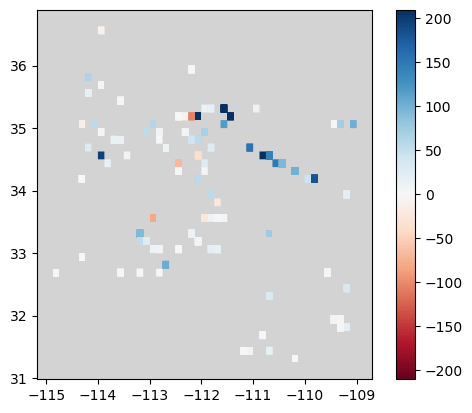

In [51]:
data = data.set_geometry("nearest_quadrangle")
ourplot=data.plot("nearby_depth_20_year_trend", legend=True, cmap='RdBu', vmin=-210 , vmax=210,facecolor="#d3d3d3")
ourplot.set_facecolor("#d3d3d3")

<Axes: >

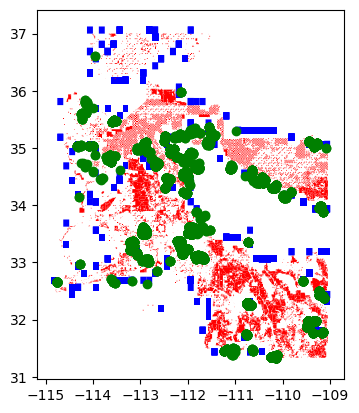

In [52]:
ourplot=data.plot(color='blue')
data = data.set_geometry("geometry")
data.plot(ax=ourplot, color="red")
wells_on_nearest_quadrangle.plot(ax=ourplot, color="green")

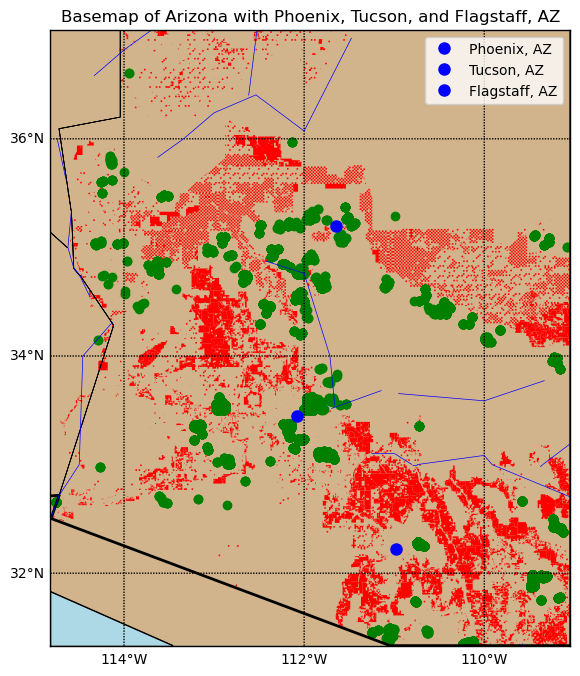

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Define the boundaries of Arizona
lat_1 = 31.3322
lat_2 = 37.0043
lon_1 = -114.8181
lon_2 = -109.0452

# Create Basemap instance for Arizona
m = Basemap(projection='cyl', llcrnrlat=lat_1, urcrnrlat=lat_2,
            llcrnrlon=lon_1, urcrnrlon=lon_2, resolution='c', ax=ax)

m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawparallels(range(30, 40, 2), labels=[1, 0, 0, 0])
m.drawmeridians(range(-120, -100, 2), labels=[0, 0, 0, 1])
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')


phoenix_lat, phoenix_lon = 33.4484, -112.0740
tucson_lat, tucson_lon = 32.2226, -110.9747
flagstaff_lat, flagstaff_lon = 35.1983, -111.6513

x_phoenix, y_phoenix = m(phoenix_lon, phoenix_lat)
x_tucson, y_tucson = m(tucson_lon, tucson_lat)
x_flagstaff, y_flagstaff = m(flagstaff_lon, flagstaff_lat)

m.plot(x_phoenix, y_phoenix, 'bo', markersize=8, label='Phoenix, AZ')
m.plot(x_tucson, y_tucson, 'bo', markersize=8, label='Tucson, AZ')
m.plot(x_flagstaff, y_flagstaff, 'bo', markersize=8, label='Flagstaff, AZ')

plt.legend()
data.plot(ax=ax, color="red")
wells_on_nearest_quadrangle.plot(ax=ax, color="green")

plt.title('Basemap of Arizona with Phoenix, Tucson, and Flagstaff, AZ')
plt.show()

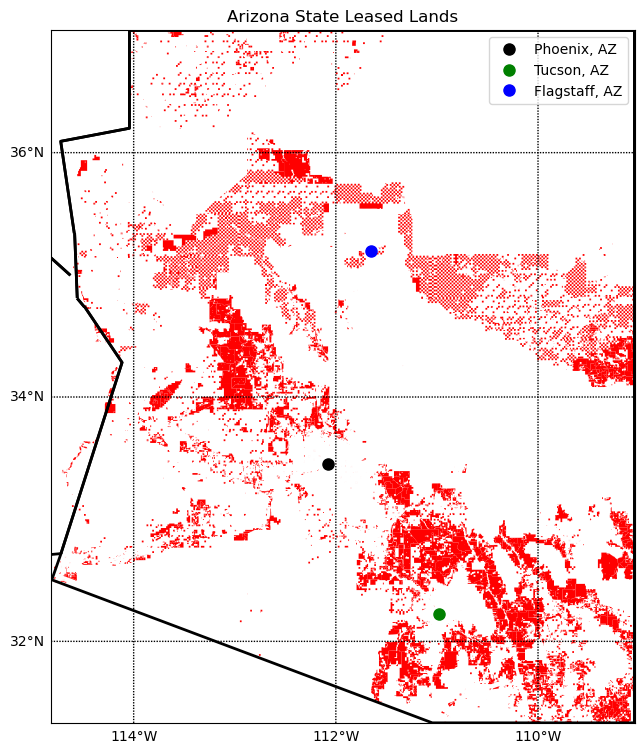

In [54]:
fig, ax = plt.subplots(figsize=(9, 9))

lat_1 = 31.3322
lat_2 = 37.0043
lon_1 = -114.8181
lon_2 = -109.0452


m = Basemap(projection='cyl', llcrnrlat=lat_1, urcrnrlat=lat_2,
            llcrnrlon=lon_1, urcrnrlon=lon_2, resolution='c', ax=ax)


m.drawstates(linewidth=2)
m.drawcountries(linewidth=2)
m.drawparallels(range(30, 40, 2), labels=[1, 0, 0, 0])
m.drawmeridians(range(-120, -100, 2), labels=[0, 0, 0, 1])
phoenix_lat, phoenix_lon = 33.4484, -112.0740
tucson_lat, tucson_lon = 32.2226, -110.9747
flagstaff_lat, flagstaff_lon = 35.1983, -111.6513

x_phoenix, y_phoenix = m(phoenix_lon, phoenix_lat)
x_tucson, y_tucson = m(tucson_lon, tucson_lat)
x_flagstaff, y_flagstaff = m(flagstaff_lon, flagstaff_lat)

m.plot(x_phoenix, y_phoenix, 'ko', markersize=8, label='Phoenix, AZ')
m.plot(x_tucson, y_tucson, 'go', markersize=8, label='Tucson, AZ')
m.plot(x_flagstaff, y_flagstaff, 'bo', markersize=8, label='Flagstaff, AZ')

data.plot(ax=ax, color="red",alpha=1)

plt.title('Arizona State Leased Lands')
plt.legend()
plt.show()
#Need to fix color disparaties. 



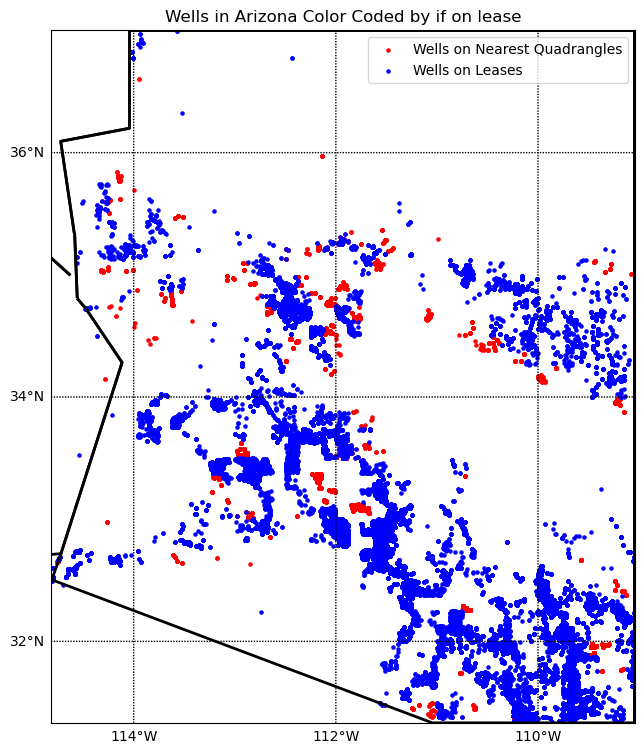

In [55]:
fig, ax = plt.subplots(figsize=(9, 9))

lat_1 = 31.3322
lat_2 = 37.0043
lon_1 = -114.8181
lon_2 = -109.0452

m = Basemap(projection='cyl', llcrnrlat=lat_1, urcrnrlat=lat_2,
            llcrnrlon=lon_1, urcrnrlon=lon_2, resolution='c', ax=ax)

m.drawstates(linewidth=2)
m.drawcountries(linewidth=2)
m.drawparallels(range(30, 40, 2), labels=[1, 0, 0, 0])
m.drawmeridians(range(-120, -100, 2), labels=[0, 0, 0, 1])
marker_size = 5
wells_on_nearest_quadrangle.plot(ax=ax, color="red", markersize=marker_size, label='Wells on Nearest Quadrangles')
wells_on_leasedland.plot(ax=ax, color="blue", markersize=marker_size, label='Wells on Leases')

plt.title('Wells in Arizona Color Coded by if on lease')
plt.legend()
plt.show()


In [56]:
data = data.set_geometry("lease_quadrangle")

C:\Users\liamw\AppData\Local\Temp\ipykernel_5328\2465658984.py:21: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


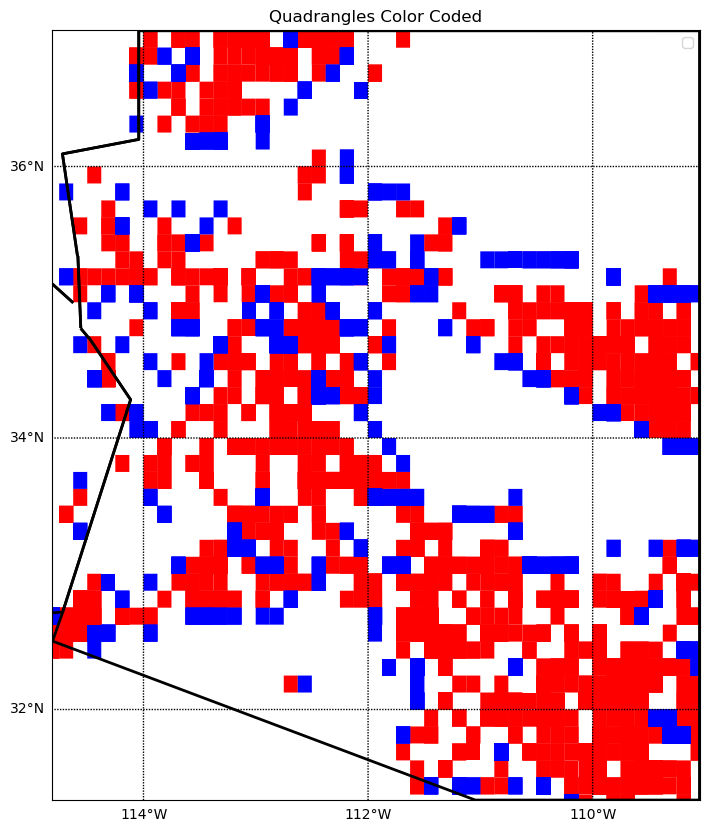

In [57]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(10, 10))

lat_1 = 31.3322
lat_2 = 37.0043
lon_1 = -114.8181
lon_2 = -109.0452
m = Basemap(projection='cyl', llcrnrlat=lat_1, urcrnrlat=lat_2,
            llcrnrlon=lon_1, urcrnrlon=lon_2, resolution='c', ax=ax)
m.drawstates(linewidth=2)
m.drawcountries(linewidth=2)
m.drawparallels(range(30, 40, 2), labels=[1, 0, 0, 0])
m.drawmeridians(range(-120, -100, 2), labels=[0, 0, 0, 1])
data.plot(ax=ax, color="red",label= 'State Leased land quadrangles ')
data = data.set_geometry("nearest_quadrangle")
data.plot(ax=ax, color="blue", label='nearest quadrangles')
plt.title('Quadrangles Color Coded')
legend_handles = [
    mpatches.Patch(color='red', label='State Leased land quadrangles'),
    mpatches.Patch(color='blue', label='Nearest Quadrangles')]
plt.legend()
plt.show()
#Need to fix color disparaties. 